In [7]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import time
import datetime

import smtplib

<Response [200]>
<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://rukminim2.flixcart.com" rel="preconnect"/>
<link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/>
<link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/>
<link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.1def6f.css" rel="stylesheet"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="102988293558" property="fb:page_id"/>
<meta content="658873552,624500995,100000233612389" property="fb:admins"/>
<link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
<link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
<meta content="website" property="og:type"/>
<met
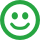

In [8]:
# Connecting to website and viewing the HTML content.

url = "https://www.flipkart.com/ajolli-solid-men-polo-neck-dark-green-t-shirt/p/itm5bf30492f17ec?pid=TSHHYRDUJQTKTDTQ&lid=LSTTSHHYRDUJQTKTDTQBME8KR&marketplace=FLIPKART&store=clo%2Fash%2Fank%2Fedy&srno=b_1_1&otracker=browse&fm=neo%2Fmerchandising&iid=en_oda9HUlziGoRAeDPo099BOSLcBNGhf7lS-vvgy9QWSGRNuvdaEpKw-dzBgxje_SLcPzCLOkWgElSNIrKeR-bug%3D%3D&ppt=browse&ppn=browse&ssid=1y7kq3wsow0000001726613851326%22"
headers = ({'User-Agent' : "https://www.flipkart.com/ajolli-solid-men-polo-neck-dark-green-t-shirt/p/itm5bf30492f17ec?pid=TSHHYRDUJQTKTDTQ&lid=LSTTSHHYRDUJQTKTDTQBME8KR&marketplace=FLIPKART&store=clo%2Fash%2Fank%2Fedy&srno=b_1_1&otracker=browse&fm=neo%2Fmerchandising&iid=en_oda9HUlziGoRAeDPo099BOSLcBNGhf7lS-vvgy9QWSGRNuvdaEpKw-dzBgxje_SLcPzCLOkWgElSNIrKeR-bug%3D%3D&ppt=browse&ppn=browse&ssid=1y7kq3wsow0000001726613851326%22"})
page = requests.get(URL, headers=headers)
print(page)
soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
print(soup2)





In [5]:
def get_title(soup):

    try:
        tittle = soup1.find("span",attrs= {'class':"VU-ZEz"}).text.strip()
        title_string = tittle
    except AttributeError:
        title_string = ""

    return title_string

In [7]:
# Function to extract Product Price
def get_price(soup):

    try:
       price = soup2.find("div",attrs= {'class':"Nx9bqj CxhGGd"}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup2.find("div",attrs= {'class':"Nx9bqj CxhGGd"}).string.strip()

        except:
            price = ""

    return price

In [11]:
print (get_price(soup2)[1:])

In [13]:
get_title(soup2)


''

In [15]:
# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup1.find('div', class_= "XQDdHH _6er70b").get_text()
    
    except AttributeError:
        try:
            rating = soup1.find('div', class_= "XQDdHH _6er70b").get_text()
        except:
            rating = ""	

    return rating

In [17]:
get_rating(soup2)

''

In [20]:
def get_review_count(soup):
    try:
        review_count = soup2.find("span", class_='Wphh3N d4OmzS').find('span').string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

In [22]:
get_review_count(soup1)

''

In [24]:
# Creating a Timestamp to track when data was collected

import datetime
today=datetime.datetime.now()

print(today)

2024-09-22 02:05:24.747684


In [26]:
import csv 

price = get_price(soup2)
price1=price[1:]
title = get_title(soup2)
Date=datetime.datetime.now()
Review_Count = get_review_count(soup1)
rating = get_rating(soup2)
header = ['Title', 'Price', 'Rating_out_5','Review_Count','Date']
data = [title, price1, rating, Review_Count, today]

with open('FlipKart_shirt.csv', 'w', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerow(data)


In [28]:
def check_price():
    price = get_price(soup2)
    price1=price[1:]
    title = get_title(soup2)
    Date=datetime.datetime.now()
    Review_Count = get_review_count(soup1)
    rating = get_rating(soup2)
    header = ['Title', 'Price', 'Rating_out_5','Review_Count','Date']
    data = [title, price1, rating, Review_Count, today]
    with open('FlipKart_shirt.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [30]:
import pandas as pd

df = pd.read_csv(r'C:\Users\hp\FlipKart_shirt.csv')

print(df)

   Title  Price  Rating_out_5  Review_Count                        Date
0    NaN    NaN           NaN           NaN  2024-09-22 02:05:24.747684


In [ ]:
# Runs check_price after a set time and inputs data into your CSV

while(True):
    check_price()
    time.sleep(30)




In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\hp\FlipKart_shirt.csv')

print(df)

In [ ]:
# If wanted to try sending email to myself(just for fun) when a price hits below a certain price point

def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('binnu77777@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The Shirt you want is below 200 rs! Now is your chance to buy!"
    body = "Krishna, Now is your chance to pick up the shirt of your dreams"
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'binnu77777@gmail.com',
        msg
     
    )